In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 한글 설정
# pip install koreanize_matplotlib
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# root = 'C:/workspace/python/project/data/'
root = 'G:/workspace/python/python_project/data/'

# 구글드라이브 : https://drive.google.com/drive/folders/1zIzm1o8-3uxcWSU2DoWpB8aV0Oxdfz_P?usp=sharing

In [3]:
'''
건축거래 현황 데이터 프레임

국가통계포털 > 검색 (행정구역별 건축물거래현황)
https://kosis.kr/search/search.do
'''
house_transaction_df = pd.read_csv(root + '주거실태_Data/행정구역별_건축물거래현황_20241126100629.csv', encoding='cp949', header=None)
# house_transaction_df = pd.read_csv(root + '주거실태_Data/행정구역별_건축물거래현황_20241126100629.csv', encoding='cp949')

In [4]:
house_transaction_df.loc[:, 0:5][:5]

,0,1,2,3,4,5
0,행정구역별(1),행정구역별(2),2021.01,2021.01,2021.02,2021.02
1,행정구역별(1),행정구역별(2),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡)
2,서울특별시,소계,28958,2319,24068,2163
3,서울특별시,종로구,415,33,602,55
4,서울특별시,중구,690,49,563,24


In [5]:
house_transaction_df.columns = house_transaction_df.iloc[0]
house_transaction_df

,행정구역별(1),행정구역별(2),2021.01,2021.01,2021.02,2021.02,2021.03,2021.03,2021.04,2021.04,...,2024.05,2024.05,2024.06,2024.06,2024.07,2024.07,2024.08,2024.08,2024.09,2024.09
0,행정구역별(1),행정구역별(2),2021.01,2021.01,2021.02,2021.02,2021.03,2021.03,2021.04,2021.04,...,2024.05,2024.05,2024.06,2024.06,2024.07,2024.07,2024.08,2024.08,2024.09,2024.09
1,행정구역별(1),행정구역별(2),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),...,동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡)
2,서울특별시,소계,28958,2319,24068,2163,25656,2358,29547,2971,...,14349,1187,15852,1231,20525,1627,17810,1475,16428,1491
3,서울특별시,종로구,415,33,602,55,499,60,500,55,...,344,27,219,52,275,25,315,28,172,18
4,서울특별시,중구,690,49,563,24,1234,133,725,74,...,380,23,228,15,391,96,330,34,423,42
5,서울특별시,용산구,592,47,615,45,639,54,1000,136,...,345,36,414,38,430,31,533,46,401,42
6,서울특별시,성동구,681,57,676,64,1292,117,526,47,...,475,43,1102,81,738,58,576,75,423,42
7,서울특별시,광진구,538,39,573,46,619,49,1644,90,...,378,31,536,37,662,50,583,48,456,51
8,서울특별시,동대문구,1074,72,711,44,725,91,1096,76,...,612,37,577,41,1548,92,760,48,645,42
9,서울특별시,중랑구,866,62,758,53,824,74,948,69,...,413,69,369,26,523,34,444,30,463,27


In [6]:
house_transaction_df = house_transaction_df.rename(columns={'행정구역별(2)':'구'})
house_transaction_df

,행정구역별(1),구,2021.01,2021.01,2021.02,2021.02,2021.03,2021.03,2021.04,2021.04,...,2024.05,2024.05,2024.06,2024.06,2024.07,2024.07,2024.08,2024.08,2024.09,2024.09
0,행정구역별(1),행정구역별(2),2021.01,2021.01,2021.02,2021.02,2021.03,2021.03,2021.04,2021.04,...,2024.05,2024.05,2024.06,2024.06,2024.07,2024.07,2024.08,2024.08,2024.09,2024.09
1,행정구역별(1),행정구역별(2),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),...,동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡)
2,서울특별시,소계,28958,2319,24068,2163,25656,2358,29547,2971,...,14349,1187,15852,1231,20525,1627,17810,1475,16428,1491
3,서울특별시,종로구,415,33,602,55,499,60,500,55,...,344,27,219,52,275,25,315,28,172,18
4,서울특별시,중구,690,49,563,24,1234,133,725,74,...,380,23,228,15,391,96,330,34,423,42
5,서울특별시,용산구,592,47,615,45,639,54,1000,136,...,345,36,414,38,430,31,533,46,401,42
6,서울특별시,성동구,681,57,676,64,1292,117,526,47,...,475,43,1102,81,738,58,576,75,423,42
7,서울특별시,광진구,538,39,573,46,619,49,1644,90,...,378,31,536,37,662,50,583,48,456,51
8,서울특별시,동대문구,1074,72,711,44,725,91,1096,76,...,612,37,577,41,1548,92,760,48,645,42
9,서울특별시,중랑구,866,62,758,53,824,74,948,69,...,413,69,369,26,523,34,444,30,463,27


In [7]:
house_transaction_df = house_transaction_df.drop(columns=['행정구역별(1)'])
house_transaction_df

,구,2021.01,2021.01,2021.02,2021.02,2021.03,2021.03,2021.04,2021.04,2021.05,...,2024.05,2024.05,2024.06,2024.06,2024.07,2024.07,2024.08,2024.08,2024.09,2024.09
0,행정구역별(2),2021.01,2021.01,2021.02,2021.02,2021.03,2021.03,2021.04,2021.04,2021.05,...,2024.05,2024.05,2024.06,2024.06,2024.07,2024.07,2024.08,2024.08,2024.09,2024.09
1,행정구역별(2),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),...,동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡)
2,소계,28958,2319,24068,2163,25656,2358,29547,2971,27000,...,14349,1187,15852,1231,20525,1627,17810,1475,16428,1491
3,종로구,415,33,602,55,499,60,500,55,497,...,344,27,219,52,275,25,315,28,172,18
4,중구,690,49,563,24,1234,133,725,74,646,...,380,23,228,15,391,96,330,34,423,42
5,용산구,592,47,615,45,639,54,1000,136,776,...,345,36,414,38,430,31,533,46,401,42
6,성동구,681,57,676,64,1292,117,526,47,658,...,475,43,1102,81,738,58,576,75,423,42
7,광진구,538,39,573,46,619,49,1644,90,754,...,378,31,536,37,662,50,583,48,456,51
8,동대문구,1074,72,711,44,725,91,1096,76,806,...,612,37,577,41,1548,92,760,48,645,42
9,중랑구,866,62,758,53,824,74,948,69,941,...,413,69,369,26,523,34,444,30,463,27


In [8]:
'''
0 행 삭제 클래스
'''
class ManagedDataFrame:
    def __init__(self, name, df):
        self.name = name
        self.df = df
        self.row_deleted = False  # 플래그 초기화

    def delete_row_once(self):
        if not self.row_deleted and 0 in self.df.index:
            self.df = self.df.drop(0)
            self.row_deleted = True
            print(f"{self.name}: 0행이 삭제되었습니다.")
        else:
            print(f"{self.name}: 삭제 작업이 이미 완료되었거나 0행이 없습니다.")

    # 객체 출력 시 사용자 정의 내용 반환
    def __repr__(self):
        return f"ManagedDataFrame(name={self.name}, row_deleted={self.row_deleted}, df=\n{self.df}\n)"

In [9]:
transaction_df = ManagedDataFrame('house_transaction_df', house_transaction_df)
transaction_df.delete_row_once()

house_transaction_df: 0행이 삭제되었습니다.


In [10]:
transaction_df = transaction_df.df
print(transaction_df.dtypes)
transaction_df

0
구          object
2021.01    object
2021.01    object
2021.02    object
2021.02    object
            ...  
2024.07    object
2024.08    object
2024.08    object
2024.09    object
2024.09    object
Length: 91, dtype: object


,구,2021.01,2021.01,2021.02,2021.02,2021.03,2021.03,2021.04,2021.04,2021.05,...,2024.05,2024.05,2024.06,2024.06,2024.07,2024.07,2024.08,2024.08,2024.09,2024.09
1,행정구역별(2),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),...,동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡)
2,소계,28958,2319,24068,2163,25656,2358,29547,2971,27000,...,14349,1187,15852,1231,20525,1627,17810,1475,16428,1491
3,종로구,415,33,602,55,499,60,500,55,497,...,344,27,219,52,275,25,315,28,172,18
4,중구,690,49,563,24,1234,133,725,74,646,...,380,23,228,15,391,96,330,34,423,42
5,용산구,592,47,615,45,639,54,1000,136,776,...,345,36,414,38,430,31,533,46,401,42
6,성동구,681,57,676,64,1292,117,526,47,658,...,475,43,1102,81,738,58,576,75,423,42
7,광진구,538,39,573,46,619,49,1644,90,754,...,378,31,536,37,662,50,583,48,456,51
8,동대문구,1074,72,711,44,725,91,1096,76,806,...,612,37,577,41,1548,92,760,48,645,42
9,중랑구,866,62,758,53,824,74,948,69,941,...,413,69,369,26,523,34,444,30,463,27
10,성북구,1093,70,1267,80,855,61,794,60,990,...,470,37,552,39,782,59,856,57,1217,91


In [11]:
# transaction_df.to_csv(root + '주거실태_Data/행정구역별_건축물거래현황.csv', encoding='cp949', index=False)
transaction_df

,구,2021.01,2021.01,2021.02,2021.02,2021.03,2021.03,2021.04,2021.04,2021.05,...,2024.05,2024.05,2024.06,2024.06,2024.07,2024.07,2024.08,2024.08,2024.09,2024.09
1,행정구역별(2),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),...,동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡)
2,소계,28958,2319,24068,2163,25656,2358,29547,2971,27000,...,14349,1187,15852,1231,20525,1627,17810,1475,16428,1491
3,종로구,415,33,602,55,499,60,500,55,497,...,344,27,219,52,275,25,315,28,172,18
4,중구,690,49,563,24,1234,133,725,74,646,...,380,23,228,15,391,96,330,34,423,42
5,용산구,592,47,615,45,639,54,1000,136,776,...,345,36,414,38,430,31,533,46,401,42
6,성동구,681,57,676,64,1292,117,526,47,658,...,475,43,1102,81,738,58,576,75,423,42
7,광진구,538,39,573,46,619,49,1644,90,754,...,378,31,536,37,662,50,583,48,456,51
8,동대문구,1074,72,711,44,725,91,1096,76,806,...,612,37,577,41,1548,92,760,48,645,42
9,중랑구,866,62,758,53,824,74,948,69,941,...,413,69,369,26,523,34,444,30,463,27
10,성북구,1093,70,1267,80,855,61,794,60,990,...,470,37,552,39,782,59,856,57,1217,91


In [12]:
# DataFrame 생성
df = transaction_df.copy()
df.iloc[:, 1:]

# '년도', '월' 열을 추가하고 기존의 '동(호)수'와 '면적' 정보를 각각 새롭게 정리
df_melted = pd.melt(df, id_vars=['구'], value_vars=(df.iloc[:, 1:]), var_name='년도_월', value_name='값')
df_melted[df_melted['구']=='종로구']

,구,년도_월,값
2,종로구,2021.01,415
29,종로구,2021.01,33
56,종로구,2021.02,602
83,종로구,2021.02,55
110,종로구,2021.03,499
...,...,...,...
2297,종로구,2024.07,25
2324,종로구,2024.08,315
2351,종로구,2024.08,28
2378,종로구,2024.09,172


In [13]:
df.columns

Index(['구', '2021.01', '2021.01', '2021.02', '2021.02', '2021.03', '2021.03',
       '2021.04', '2021.04', '2021.05', '2021.05', '2021.06', '2021.06',
       '2021.07', '2021.07', '2021.08', '2021.08', '2021.09', '2021.09',
       '2021.10', '2021.10', '2021.11', '2021.11', '2021.12', '2021.12',
       '2022.01', '2022.01', '2022.02', '2022.02', '2022.03', '2022.03',
       '2022.04', '2022.04', '2022.05', '2022.05', '2022.06', '2022.06',
       '2022.07', '2022.07', '2022.08', '2022.08', '2022.09', '2022.09',
       '2022.10', '2022.10', '2022.11', '2022.11', '2022.12', '2022.12',
       '2023.01', '2023.01', '2023.02', '2023.02', '2023.03', '2023.03',
       '2023.04', '2023.04', '2023.05', '2023.05', '2023.06', '2023.06',
       '2023.07', '2023.07', '2023.08', '2023.08', '2023.09', '2023.09',
       '2023.10', '2023.10', '2023.11', '2023.11', '2023.12', '2023.12',
       '2024.01', '2024.01', '2024.02', '2024.02', '2024.03', '2024.03',
       '2024.04', '2024.04', '2024.05', '2024.

In [14]:
tmp_df = df.iloc[:, 1:]
tmp_df.columns

Index(['2021.01', '2021.01', '2021.02', '2021.02', '2021.03', '2021.03',
       '2021.04', '2021.04', '2021.05', '2021.05', '2021.06', '2021.06',
       '2021.07', '2021.07', '2021.08', '2021.08', '2021.09', '2021.09',
       '2021.10', '2021.10', '2021.11', '2021.11', '2021.12', '2021.12',
       '2022.01', '2022.01', '2022.02', '2022.02', '2022.03', '2022.03',
       '2022.04', '2022.04', '2022.05', '2022.05', '2022.06', '2022.06',
       '2022.07', '2022.07', '2022.08', '2022.08', '2022.09', '2022.09',
       '2022.10', '2022.10', '2022.11', '2022.11', '2022.12', '2022.12',
       '2023.01', '2023.01', '2023.02', '2023.02', '2023.03', '2023.03',
       '2023.04', '2023.04', '2023.05', '2023.05', '2023.06', '2023.06',
       '2023.07', '2023.07', '2023.08', '2023.08', '2023.09', '2023.09',
       '2023.10', '2023.10', '2023.11', '2023.11', '2023.12', '2023.12',
       '2024.01', '2024.01', '2024.02', '2024.02', '2024.03', '2024.03',
       '2024.04', '2024.04', '2024.05', '2024.05', 

In [15]:
category_2021 = df.columns.str.contains('2021.01')
category_2021[0] = True
category_2021

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [16]:
category_2021_df = df.loc[:, category_2021]
category_2021_df
col_2021 = category_2021_df.loc[1].values
category_2021_df.columns = col_2021
display(category_2021_df[:3])

,행정구역별(2),동(호)수 (동(호)수),면적 (천㎡)
1,행정구역별(2),동(호)수 (동(호)수),면적 (천㎡)
2,소계,28958,2319
3,종로구,415,33


In [17]:
df_2021 = pd.DataFrame(category_2021_df)
df_2021['년월'] = '2021.01'

In [18]:
df_2021 = df_2021.drop(1)

In [19]:
# 데이터프레임 병합
df_combined = pd.concat([df_2021], ignore_index=True)
# 결과 확인
display(df_combined)

,행정구역별(2),동(호)수 (동(호)수),면적 (천㎡),년월
0,소계,28958,2319,2021.01
1,종로구,415,33,2021.01
2,중구,690,49,2021.01
3,용산구,592,47,2021.01
4,성동구,681,57,2021.01
5,광진구,538,39,2021.01
6,동대문구,1074,72,2021.01
7,중랑구,866,62,2021.01
8,성북구,1093,70,2021.01
9,강북구,744,53,2021.01


In [20]:
'''   (여기서 부터 작업함 -- 희만 --)
건축거래 현황 데이터 프레임
'''
house_transaction_df = pd.read_csv(root + '주거실태_Data/행정구역별_건축물거래현황_20241126100629.csv', encoding='cp949', header=None)
# house_transaction_df = pd.read_csv(root + '주거실태_Data/행정구역별_건축물거래현황_20241126100629.csv', encoding='cp949')

In [21]:
house_transaction_df

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,행정구역별(1),행정구역별(2),2021.01,2021.01,2021.02,2021.02,2021.03,2021.03,2021.04,2021.04,...,2024.05,2024.05,2024.06,2024.06,2024.07,2024.07,2024.08,2024.08,2024.09,2024.09
1,행정구역별(1),행정구역별(2),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),...,동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡),동(호)수 (동(호)수),면적 (천㎡)
2,서울특별시,소계,28958,2319,24068,2163,25656,2358,29547,2971,...,14349,1187,15852,1231,20525,1627,17810,1475,16428,1491
3,서울특별시,종로구,415,33,602,55,499,60,500,55,...,344,27,219,52,275,25,315,28,172,18
4,서울특별시,중구,690,49,563,24,1234,133,725,74,...,380,23,228,15,391,96,330,34,423,42
5,서울특별시,용산구,592,47,615,45,639,54,1000,136,...,345,36,414,38,430,31,533,46,401,42
6,서울특별시,성동구,681,57,676,64,1292,117,526,47,...,475,43,1102,81,738,58,576,75,423,42
7,서울특별시,광진구,538,39,573,46,619,49,1644,90,...,378,31,536,37,662,50,583,48,456,51
8,서울특별시,동대문구,1074,72,711,44,725,91,1096,76,...,612,37,577,41,1548,92,760,48,645,42
9,서울특별시,중랑구,866,62,758,53,824,74,948,69,...,413,69,369,26,523,34,444,30,463,27


In [22]:
def precleaning_transaction(df, year) :
  copy_df = df.copy()
  copy_df.columns = copy_df.iloc[0] + '_' + copy_df.iloc[1]
  copy_df = copy_df.iloc[2:, 1:]
  copy_df = copy_df.rename(columns = {'행정구역별(2)_행정구역별(2)' : '구'})

  condition1 = copy_df.columns.str.contains(year)
  select_columns = copy_df.loc[:, condition1].columns
  columns = []
  columns.append('구')
  for column in select_columns :
    columns.append(column)
  
  selected_df = copy_df[columns]
  # Melt 함수를 사용하여 열을 행으로 변환
  df_melted = selected_df.melt(id_vars=['구'], var_name='월', value_name='값')
  
  # 월별 동(호)수와 면적을 구분하기 위해 컬럼을 분리
  df_melted[['연도_월', '항목']] = df_melted['월'].str.split('_', expand=True)
  
  # 항목이 동(호)수인지 면적인지에 따라 값 분리
  df_melted = df_melted.pivot_table(index=['구', '연도_월'], columns='항목', values='값', aggfunc='first').reset_index()
  return df_melted

In [23]:
house_transaction_2021_df = precleaning_transaction(house_transaction_df, '2021')
house_transaction_2021_df[:5]
house_transaction_2021_df['년도'] = 2021
house_transaction_2021_df[:5]

항목,구,연도_월,동(호)수 (동(호)수),면적 (천㎡),년도
0,강남구,2021.01,4982,493,2021
1,강남구,2021.02,1632,264,2021
2,강남구,2021.03,2052,187,2021
3,강남구,2021.04,1112,164,2021
4,강남구,2021.05,1466,158,2021


In [24]:
house_transaction_2022_df = precleaning_transaction(house_transaction_df, '2022')
house_transaction_2022_df[:5]
house_transaction_2022_df['년도'] = 2022
house_transaction_2022_df[:5]

항목,구,연도_월,동(호)수 (동(호)수),면적 (천㎡),년도
0,강남구,2022.01,769,131,2022
1,강남구,2022.02,1407,129,2022
2,강남구,2022.03,672,104,2022
3,강남구,2022.04,1124,117,2022
4,강남구,2022.05,1382,166,2022


In [25]:
house_transaction_2023_df = precleaning_transaction(house_transaction_df, '2023')
house_transaction_2023_df[:5]
house_transaction_2023_df['년도'] = 2023
house_transaction_2023_df[:5]

항목,구,연도_월,동(호)수 (동(호)수),면적 (천㎡),년도
0,강남구,2023.01,349,43,2023
1,강남구,2023.02,355,38,2023
2,강남구,2023.03,499,70,2023
3,강남구,2023.04,454,42,2023
4,강남구,2023.05,728,82,2023


In [26]:
# 데이터프레임 병합
house_transaction_combined = pd.concat([house_transaction_2021_df, house_transaction_2022_df, house_transaction_2023_df], ignore_index=True)
# 결과 확인
print(house_transaction_combined)

항목     구     연도_월 동(호)수 (동(호)수) 면적 (천㎡)    년도
0    강남구  2021.01          4982     493  2021
1    강남구  2021.02          1632     264  2021
2    강남구  2021.03          2052     187  2021
3    강남구  2021.04          1112     164  2021
4    강남구  2021.05          1466     158  2021
..   ...      ...           ...     ...   ...
931  중랑구  2023.08           304      18  2023
932  중랑구  2023.09           286      21  2023
933  중랑구  2023.10           337      21  2023
934  중랑구  2023.11           419      23  2023
935  중랑구  2023.12           796      31  2023

[936 rows x 5 columns]


In [27]:
house_transaction_combined.isna().sum()

항목
구                0
연도_월             0
동(호)수 (동(호)수)    0
면적 (천㎡)          0
년도               0
dtype: int64

In [28]:
house_transaction_combined = house_transaction_combined.rename(columns={'동(호)수 (동(호)수)':'동(호)수'})

In [29]:
house_transaction_combined['동(호)수']    = house_transaction_combined['동(호)수'].astype(int)
house_transaction_combined['면적 (천㎡)'] = house_transaction_combined['면적 (천㎡)'].astype(int)

In [30]:
house_transaction_grouped = house_transaction_combined.groupby(['년도', '구']).agg({'동(호)수': 'sum',
                                                                                    '면적 (천㎡)': 'sum'}).reset_index()
house_transaction_grouped

항목,년도,구,동(호)수,면적 (천㎡)
0,2021,강남구,20748,2490
1,2021,강동구,13813,1207
2,2021,강북구,7839,546
3,2021,강서구,20483,2092
4,2021,관악구,8169,716
...,...,...,...,...
73,2023,용산구,3241,359
74,2023,은평구,7692,489
75,2023,종로구,2600,327
76,2023,중구,3253,493


In [31]:
# 데이터 준비
grouped_data = house_transaction_grouped.copy()
grouped_data = grouped_data[grouped_data['구'] != '소계']

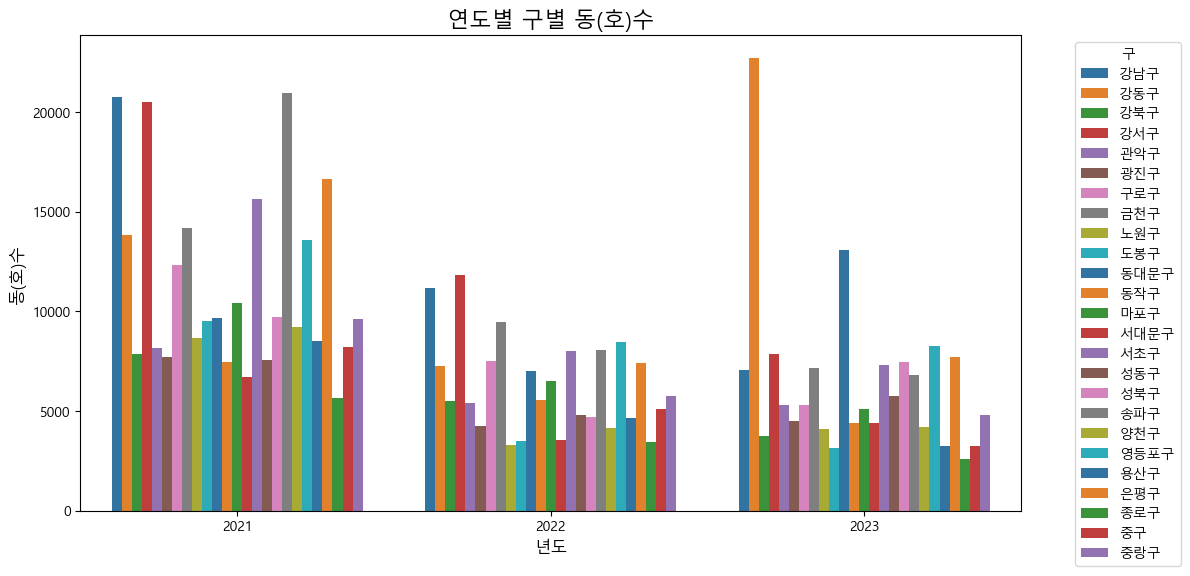

In [32]:
# 연도별 동(호)수 비교 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='년도', y='동(호)수', hue='구', data=grouped_data, palette='tab10')
plt.title('연도별 구별 동(호)수', fontsize=16)
plt.ylabel('동(호)수', fontsize=12)
plt.xlabel('년도', fontsize=12)
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

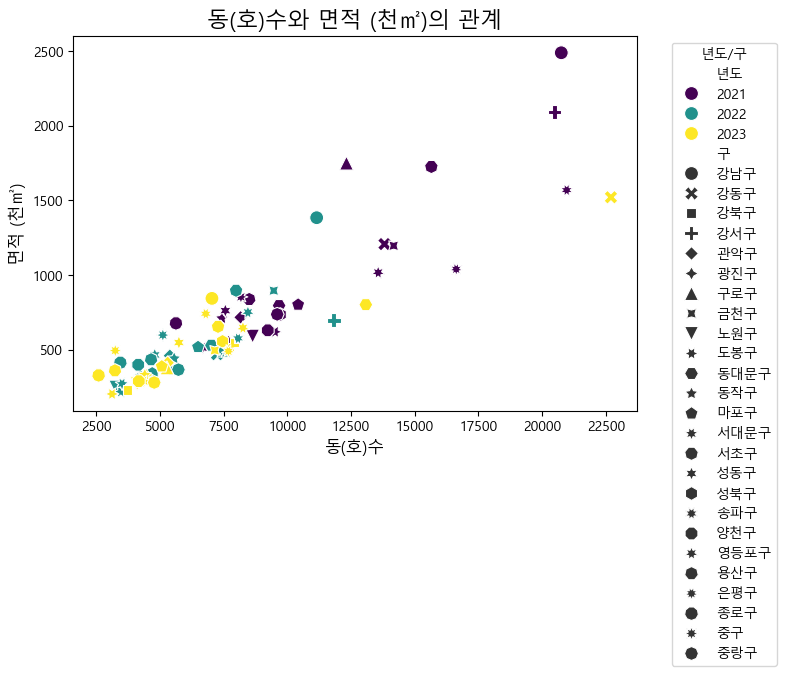

In [33]:
# 동(호)수와 면적 (천㎡)의 상관 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(x='동(호)수', y='면적 (천㎡)', hue='년도', style='구', data=grouped_data, palette='viridis', s=100)
plt.title('동(호)수와 면적 (천㎡)의 관계', fontsize=16)
plt.xlabel('동(호)수', fontsize=12)
plt.ylabel('면적 (천㎡)', fontsize=12)
plt.legend(title='년도/구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

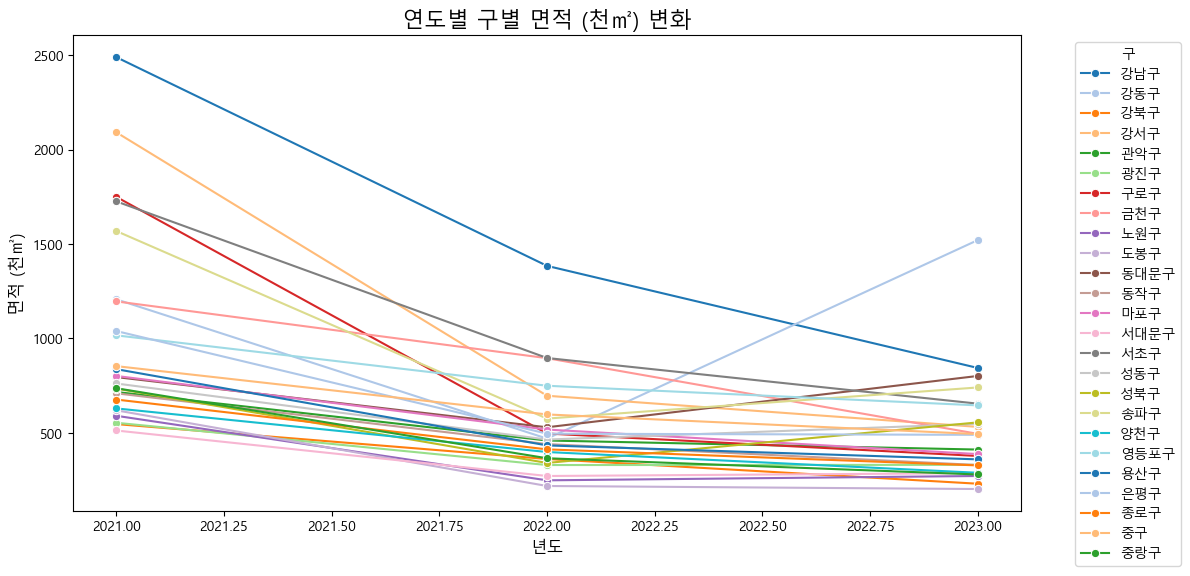

In [34]:
# 연도별 면적 (천㎡) 변화 추세선
plt.figure(figsize=(12, 6))
sns.lineplot(x='년도', y='면적 (천㎡)', hue='구', data=grouped_data, marker='o', palette='tab20')
plt.title('연도별 구별 면적 (천㎡) 변화', fontsize=16)
plt.ylabel('면적 (천㎡)', fontsize=12)
plt.xlabel('년도', fontsize=12)
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
# 데이터 추출
# house_transaction_grouped
# 소계 데이터 제외
# grouped_data
# 사용할 것

In [36]:
grouped_data.to_csv(root + '주거실태_Data/행정구역별_건축물거래현황.csv', encoding='cp949', index=False)

In [75]:
grouped_data

항목,년도,구,동(호)수,면적 (천㎡)
0,2021,강남구,20748,2490
1,2021,강동구,13813,1207
2,2021,강북구,7839,546
3,2021,강서구,20483,2092
4,2021,관악구,8169,716
...,...,...,...,...
73,2023,용산구,3241,359
74,2023,은평구,7692,489
75,2023,종로구,2600,327
76,2023,중구,3253,493
